---
title: Glyphs
date: 2023-12-301
authors:
  - name: Sébastien Boisgérault
    email: Sebastien.Boisgerault@minesparis.psl.eu
    url: https://github.com/boisgera
    affiliations:
      - institution: Mines Paris - PSL University
        department: Institut des Transformation Numériques (ITN)
github: boisgera
license: CC-BY-4.0
open_access: true
---

## Glyph Representation

![](images/z.tldraw.png)

```{exercise} Glyph Skeleton

 1. Create a new tldraw document with a unique continuous short curve created with the draw tool (called in the sequel a *glyph*).

 2. Load the document in Python and extract from it the unique record of type `draw`.

 3. Build from this record the arrays `x` and `y` of the points coordinates that describe the curve.

    ⚠️ Make sure that you get the initial values `x[0]` and `y[0]` right!

 5. Plot the curve using an aspect ratio of 1 ; make sure that your conventions for the y axis match those of tldraw.

```

![](images/z-skeleton-only.jpg)

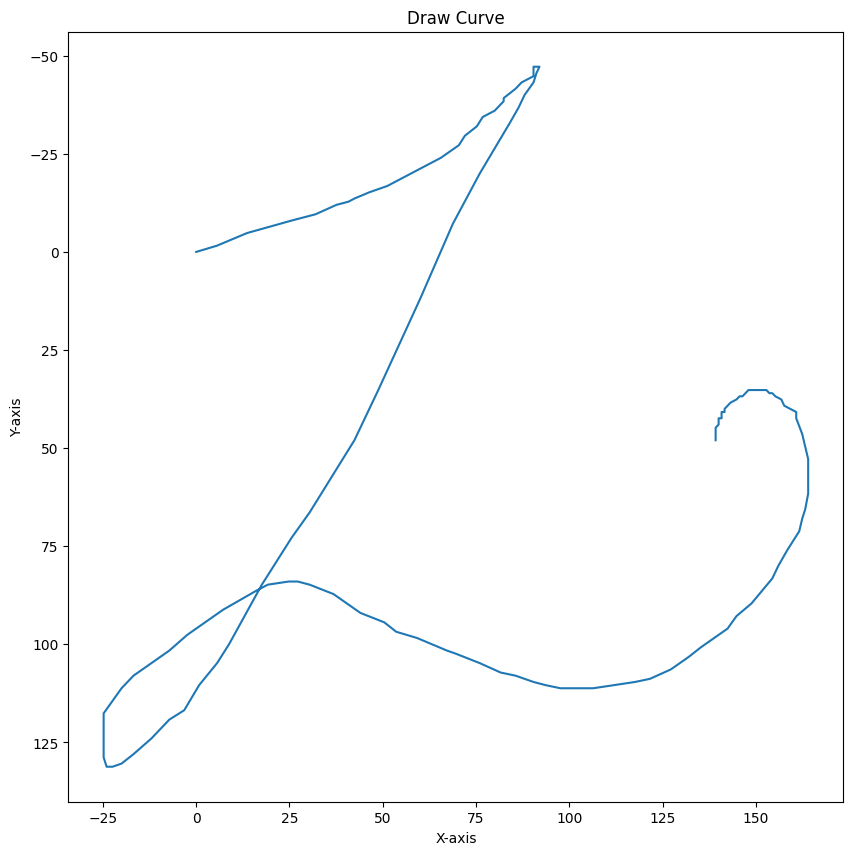

In [27]:
import json
import pprint
import matplotlib.pyplot as plt
glyph=open('glyph project tldraw.tldr','r')
doc=json.load(glyph)
record_draw=None
for record in doc['records']:
    if record.get('type')=='draw' and record.get('typeName') == 'shape':
        record_draw=record
x = [point['x'] for point in record_draw['props']['segments'][0]['points']]
y = [point['y'] for point in record_draw['props']['segments'][0]['points']]
plt.figure(figsize=(10, 10))
plt.gca().invert_yaxis()
plt.plot(x,y)
plt.title('Draw Curve')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


The curve that you have plotted only represents a "skeleton" of the glyph but not its thickness. 
The thickness itself is computed from an evaluation of the speed at which the pen travels (the faster the pen is, the smaller the curve is ; this is how the pen pressure is simulated).

```{exercise} Glyph Outline
 1. Make a new continuous curve that you draw during 6 seconds (the more precise the better ! I would advise you to use a stopwatch) ; try to move constantly when you draw the curve at first (for the initial 3 seconds) then faster (for the final 3 seconds). Then, extract the corresponding coordinates `x` and `y` in Python and make an informed guess on how these values are sampled from the "true" time-dependent curve.

 2. The `perfect-freehand` python package ports to Python the Javascript library used by tldraw to draw the curves contour. It is [available on pypi](https://pypi.org/project/perfect-freehand/) and [documented](https://bigbluebutton.github.io/perfect-freehand-python/). Use it to represent on the same matplotlib display the skeleton points and a corresponding contour.
```

![](images/z-outline.jpg)


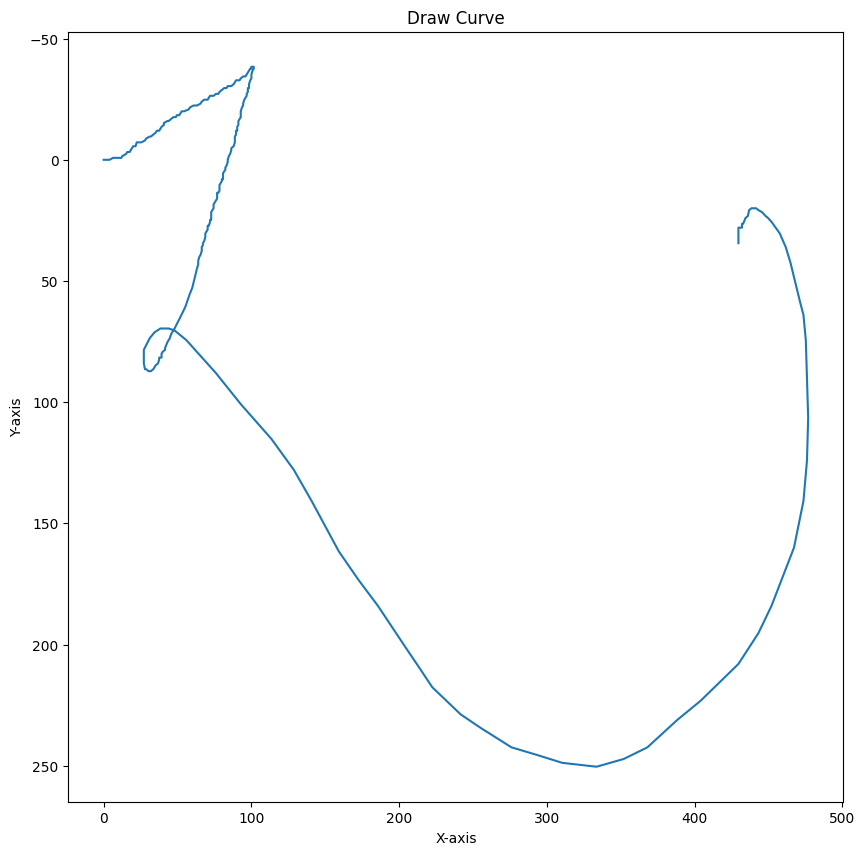

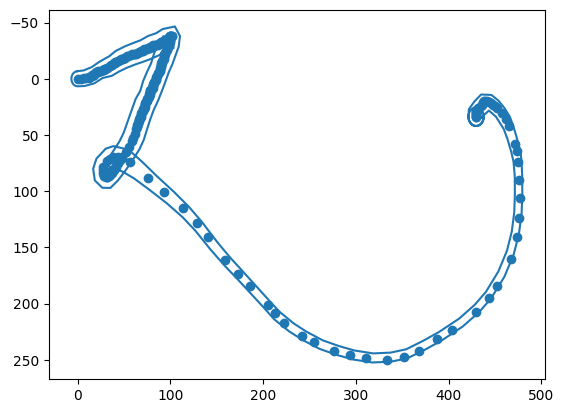

In [28]:
import json
import pprint
import matplotlib.pyplot as plt
glyph=open('glyph project tldraw 6s.tldr','r')
doc=json.load(glyph)
record_draw=None
for record in doc['records']:
    if record.get('type')=='draw' and record.get('typeName') == 'shape':
        record_draw=record
x = [point['x'] for point in record_draw['props']['segments'][0]['points']]
y = [point['y'] for point in record_draw['props']['segments'][0]['points']]
plt.figure(figsize=(10, 10))
plt.plot(x, y)
plt.title('Draw Curve')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.gca().invert_yaxis()
plt.show()

from perfect_freehand import get_stroke
input_points=[]
for i in range(len(x)):
    input_points.append((x[i],y[i]))
    
# Plot the skeleton points
plt.scatter(x, y, label='Skeleton Points')

outline_points = get_stroke(input_points)
X=[]
Y=[]
for tup in outline_points:
    X.append(tup[0])
    Y.append(tup[1])
plt.plot(X,Y)
plt.gca().invert_yaxis()
plt.show()

#it looks like it is uniformaly sampled (every given period of time a measure is taken)

## Glyph Classification


![](images/glyphs-reference.png)




```{exercise} Glyph Collection
 1. Create a tldraw document that contains many small variations of the same glyph as depicted above. Pick a glyph of your chosing!
    Save it as `docs/glyphs.tldr`.
 
    ⚠️ If you have a ✍️ pen tablet, use it; otherwise you're probably better off using your 👆 finger on a tablet / mobile phone than a 🖱️ mouse to get a collection of similar glyphs.
 2. Draw all these glyph variants in matplotib ; translate them beforehand so that they have the same center of mass and are (mostly but not entirely) superimposed.
```

![](images/glyphs-superimposed.jpg)

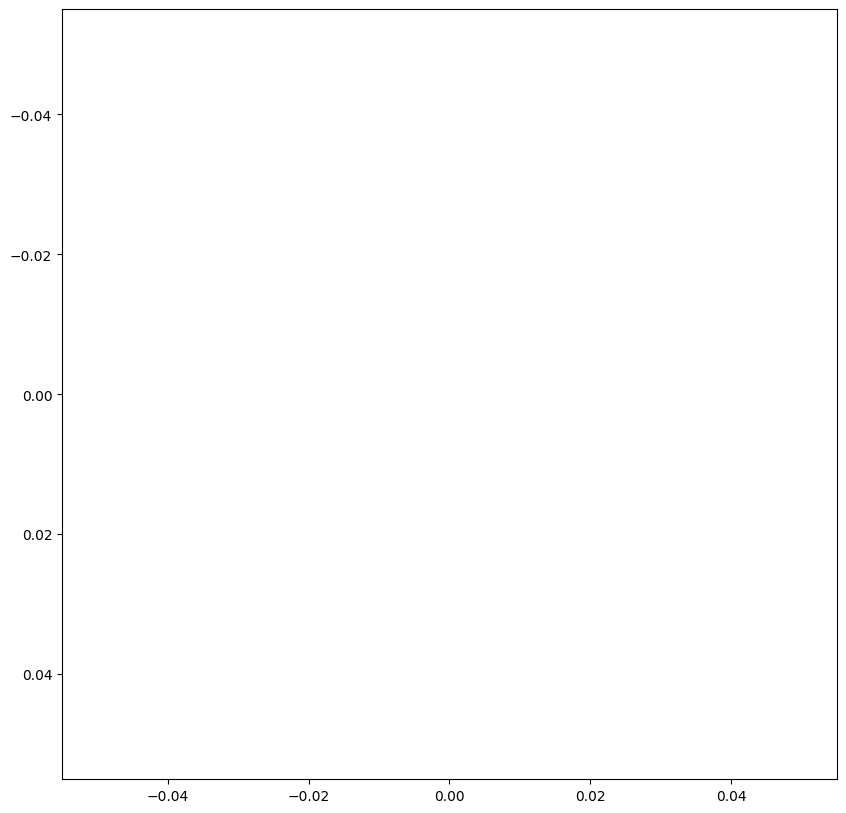

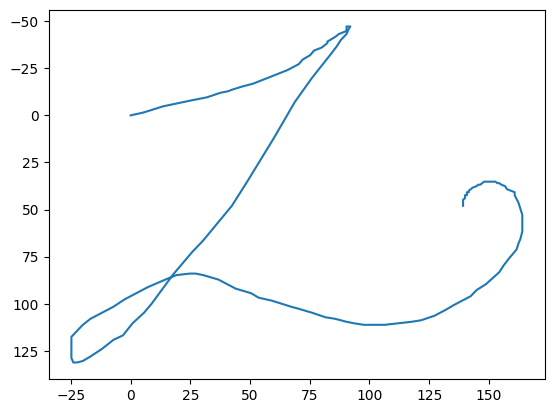

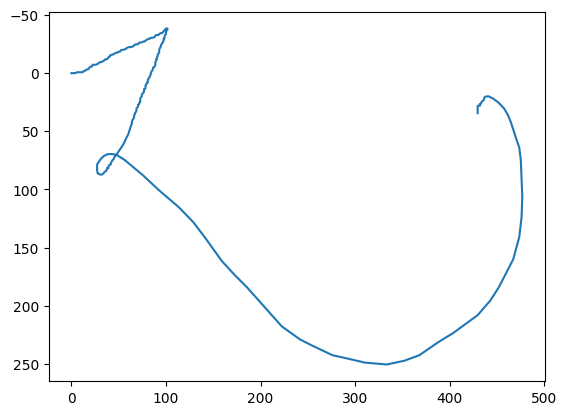

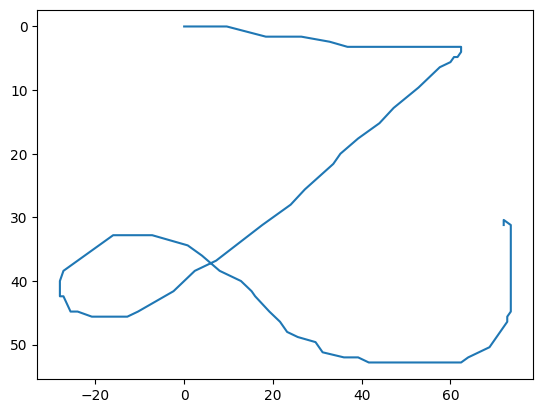

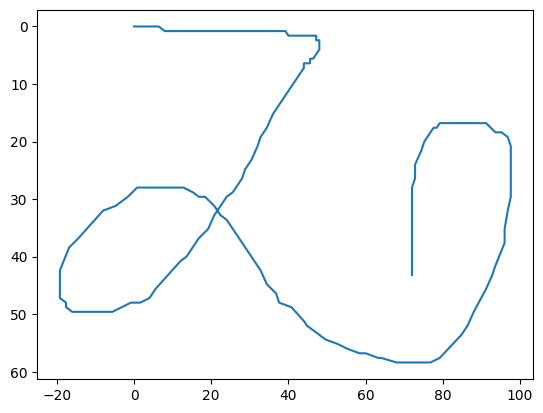

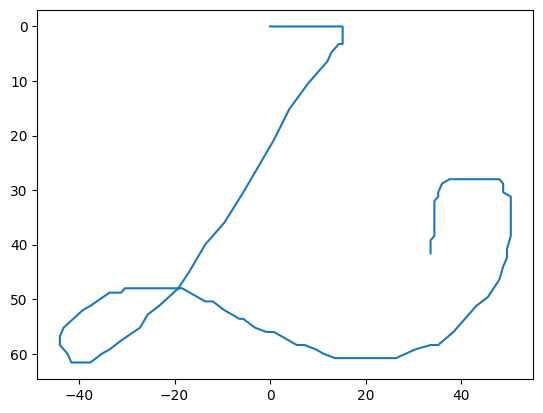

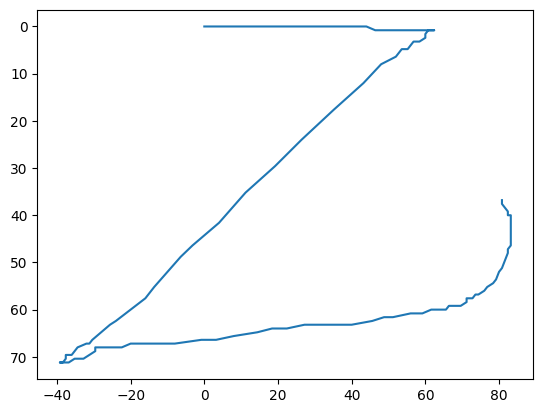

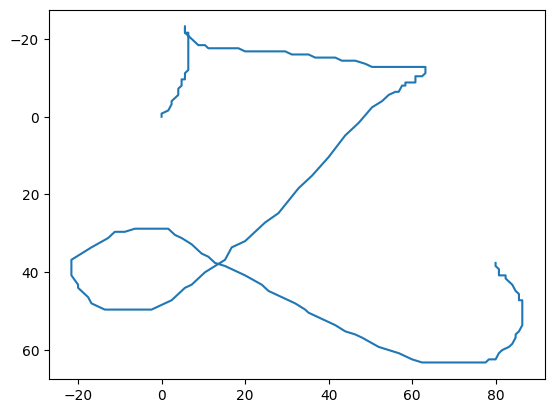

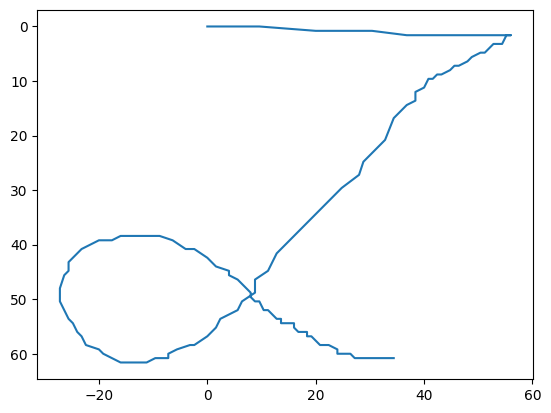

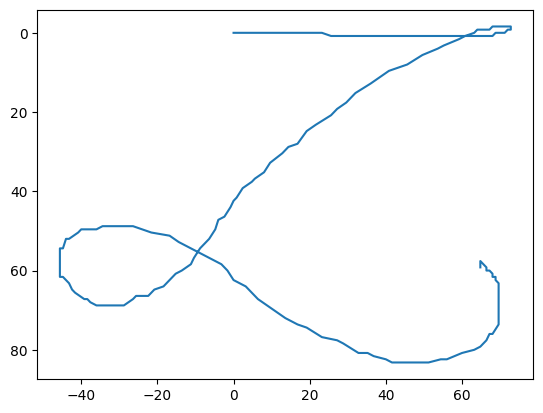

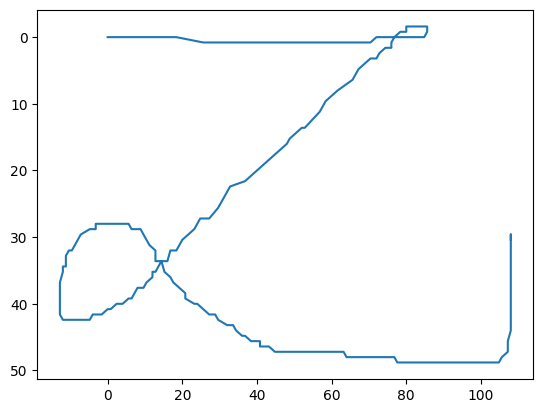

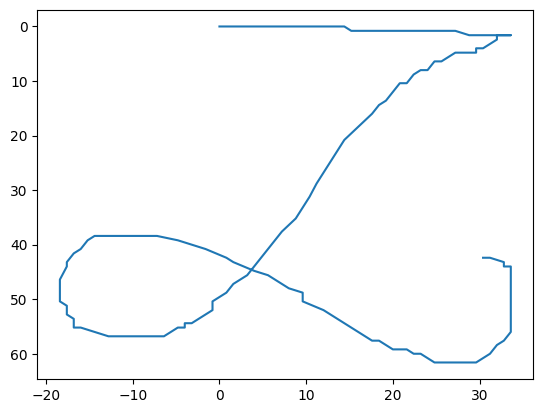

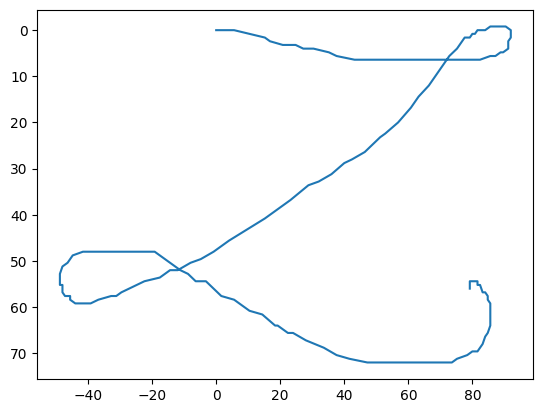

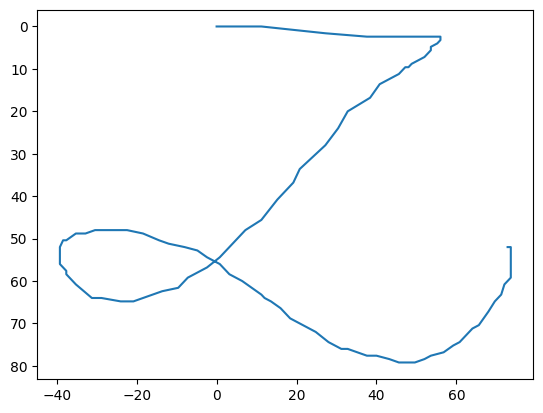

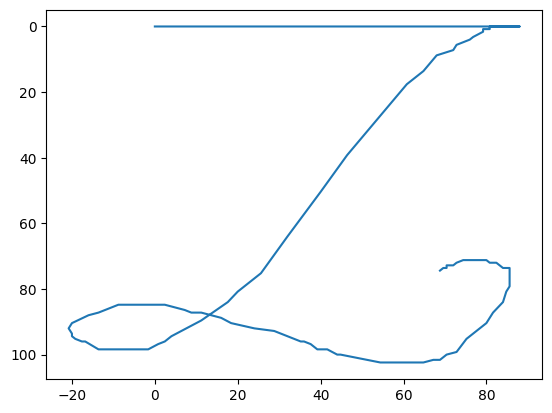

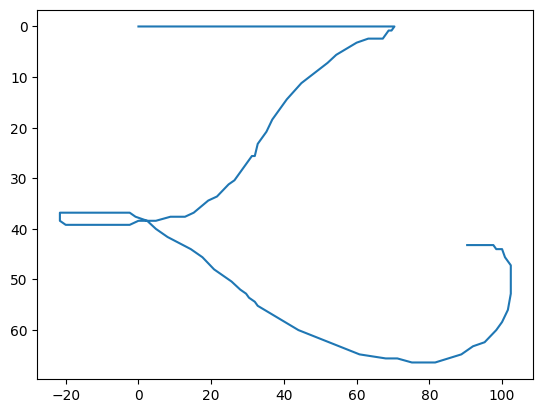

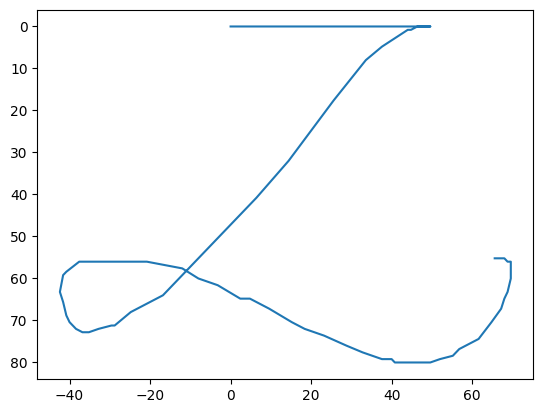

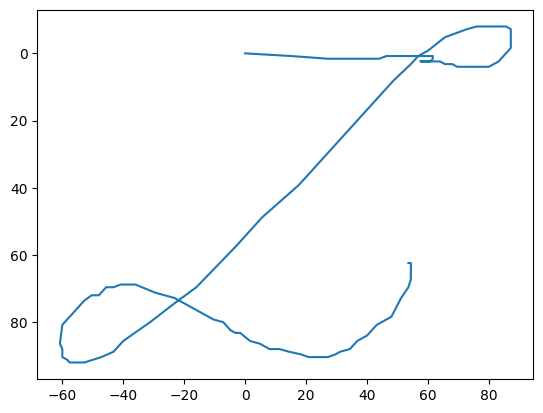

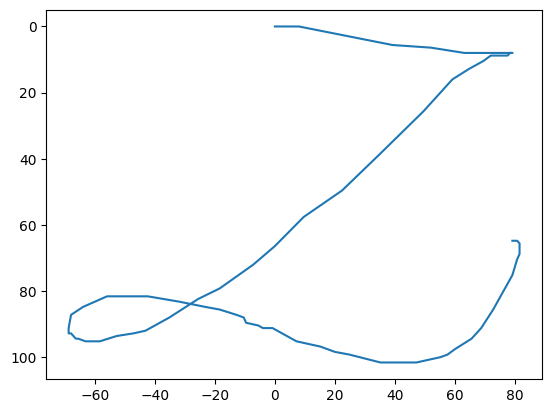

In [29]:
import json
import pprint
import matplotlib.pyplot as plt
glyph=open('variantes glyph.tldr','r')
doc=json.load(glyph)
#pprint.pprint(doc)
record_draw=[]
for record in doc['records']:
    if record.get('type')=='draw' and record.get('typeName') == 'shape':
        record_draw.append(record)
x=[]
y=[]
for i in range(len(record_draw)):
    x.append([point['x'] for point in record_draw[i]['props']['segments'][0]['points']])
    y.append([point['y'] for point in record_draw[i]['props']['segments'][0]['points']])

plt.figure(figsize=(10, 10))
for i in range(len(x)):
    plt.plot(x[i],y[i])
    plt.gca().invert_yaxis()
    plt.show()

Each glyph may have a different number of samples, so its hard to compare them directly. Additionally they may be a bit rough and could probably use a smoother and denser representation (with many more points).

```{exercise} Interpolation and Resampling
 1. Associate to any glyph represented by its coordinate a path $t \in [0, 1] \mapsto \mathbb{R}^2$ (as a Python function), using some "smooth" interpolation.
 
    **Hint:** use [`scipy.interpolate.interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html).
 
 2. Sample it uniformly to get exactly 1000 points.

```



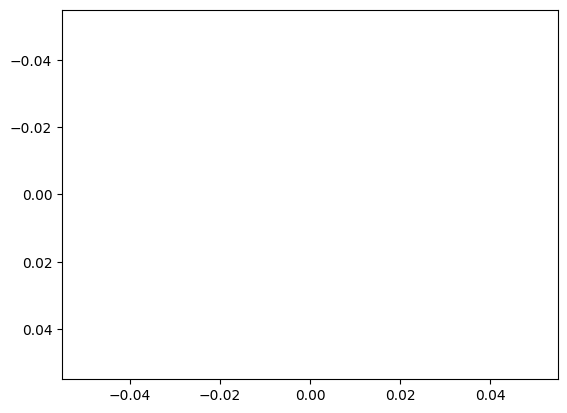

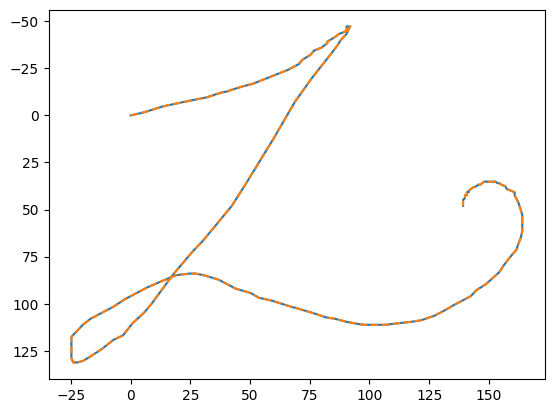

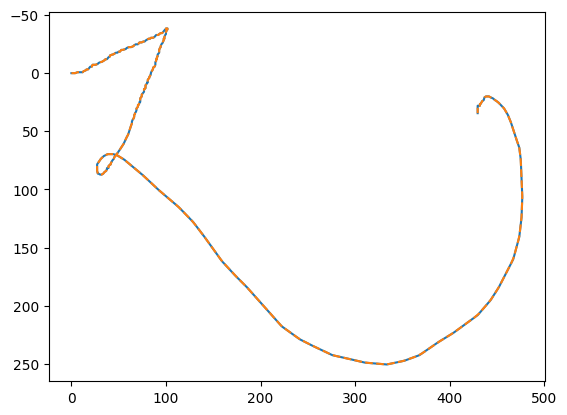

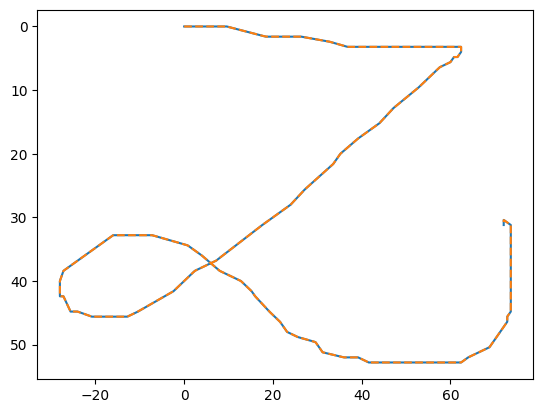

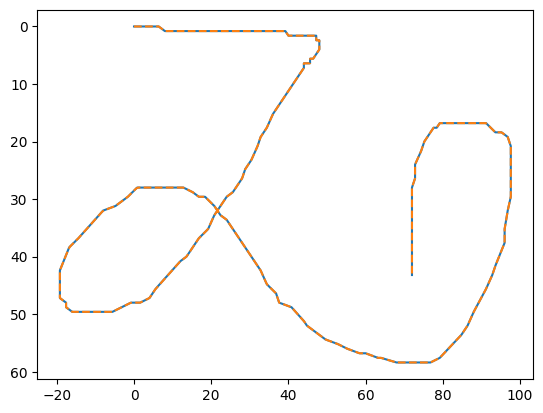

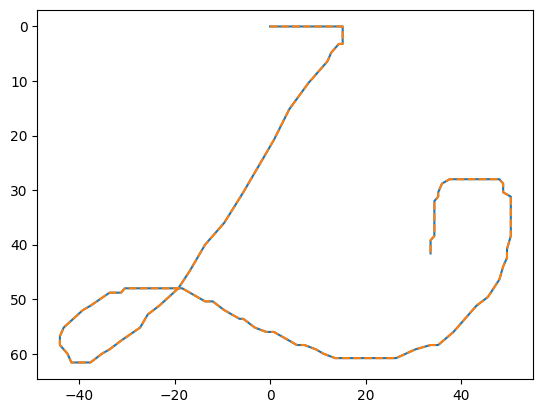

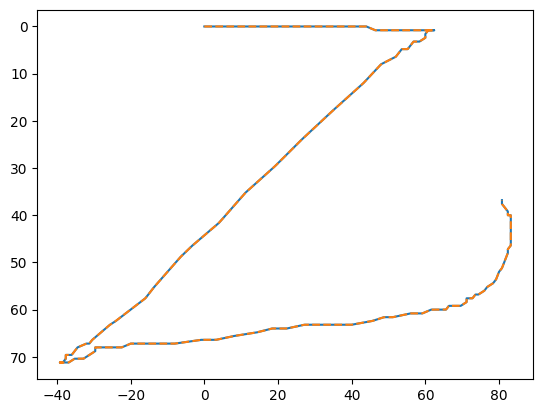

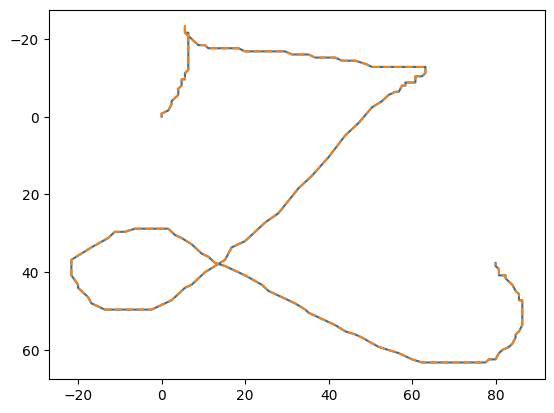

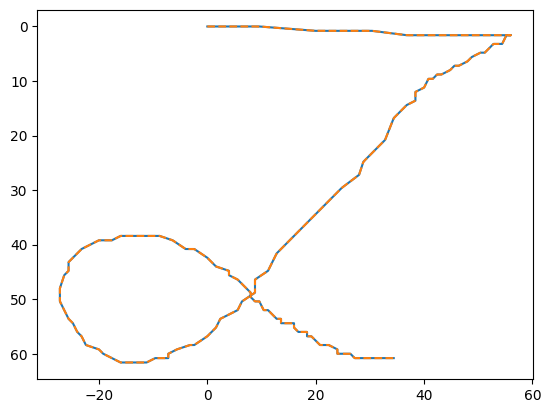

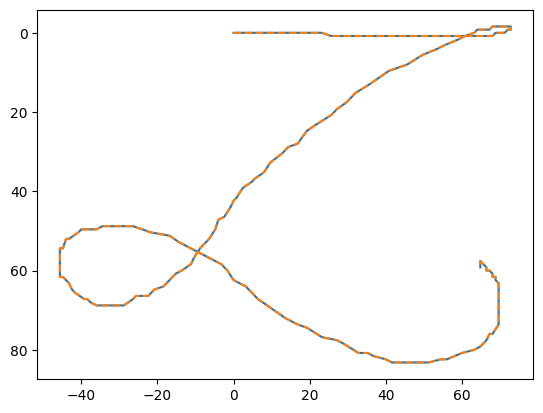

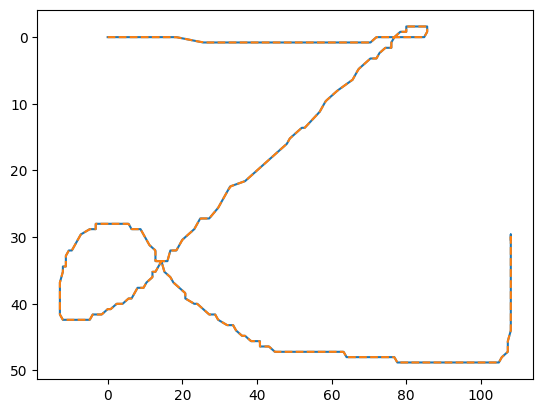

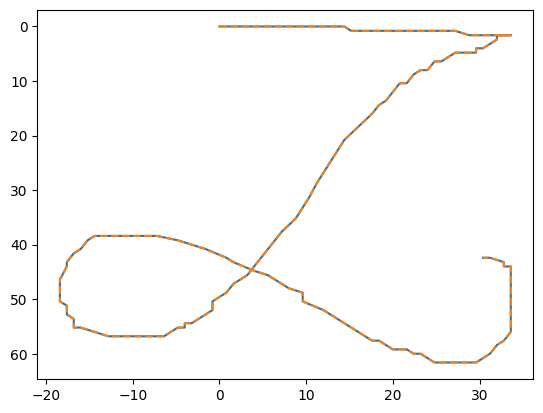

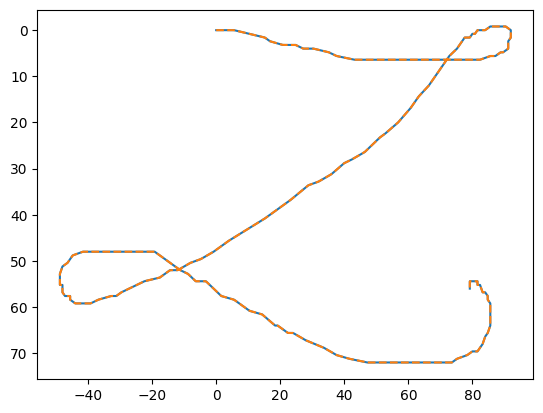

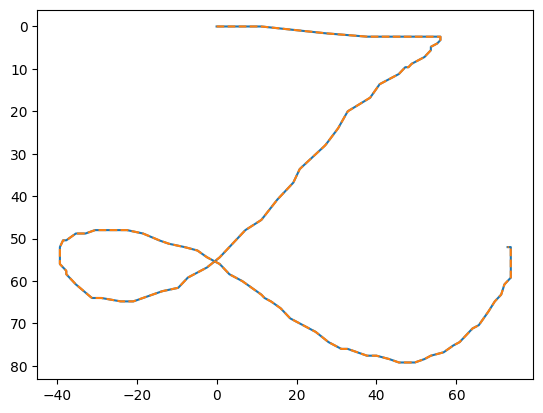

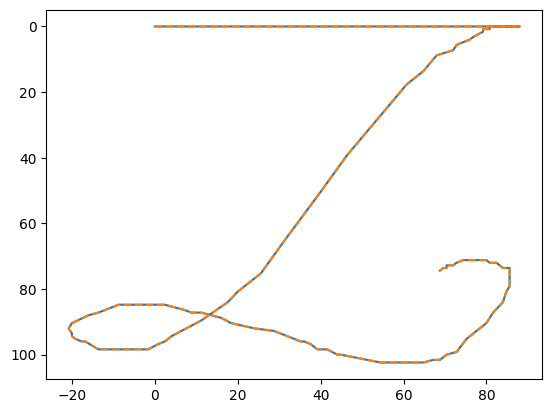

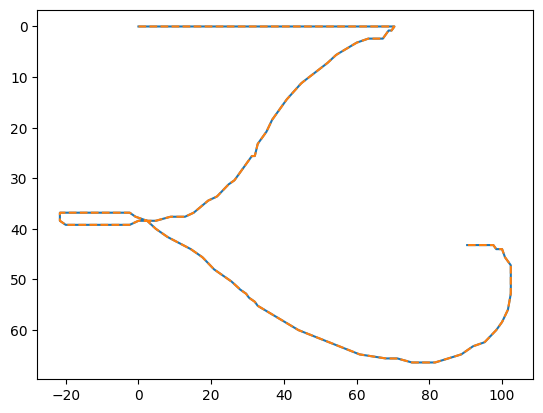

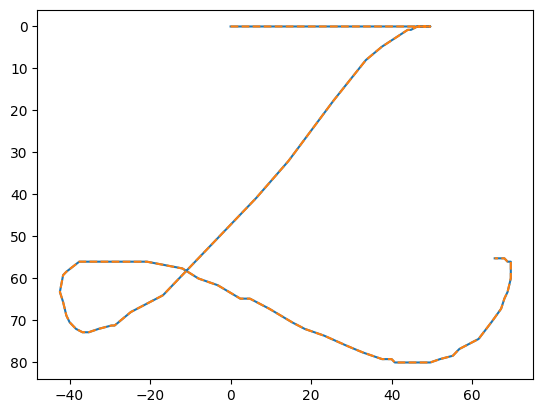

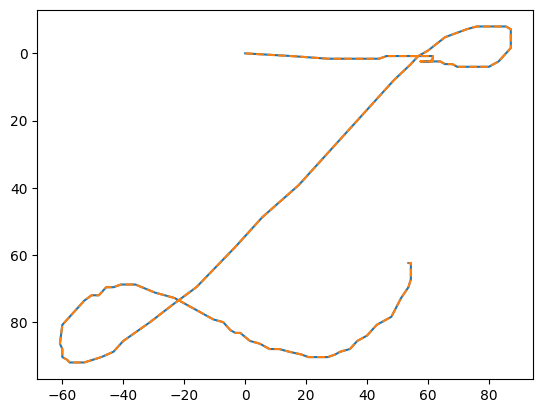

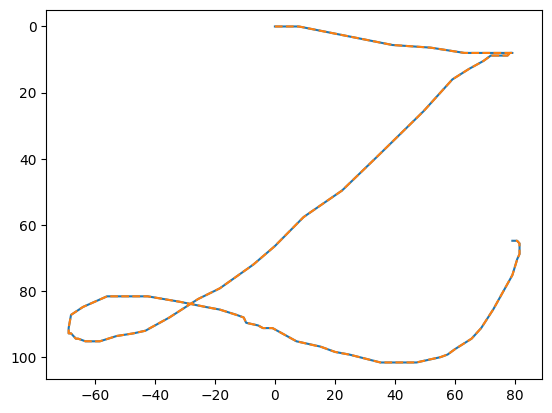

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def interpolate_path(x, y, nump=1000):
    t = np.linspace(0, 1, len(x))
    interp_fx = interp1d(t, x, kind='linear',fill_value="extrapolate")
    interp_fy = interp1d(t, y, kind='linear',fill_value="extrapolate")
    
    t_uniform = np.linspace(0, 1, nump)
    xnew = interp_fx(t_uniform)
    ynew = interp_fy(t_uniform)
    
    return xnew, ynew

xnew, ynew = None, None 

for i in range(len(x)):
    xnew, ynew = interpolate_path(x[i], y[i])
    plt.gca().invert_yaxis()
    plt.plot(x[i], y[i], label='Original Path')
    plt.plot(xnew, ynew, label='Interpolated Path', linestyle='--')
    plt.show()


```{exercise} Mean Glyph
 1. Use the set of resampled coordinates to compute the (resampled) "mean glyph" that averages the features of all glyphs. 
 2. Draw this glyph !
```

![](images/glyphs-mean.jpg)

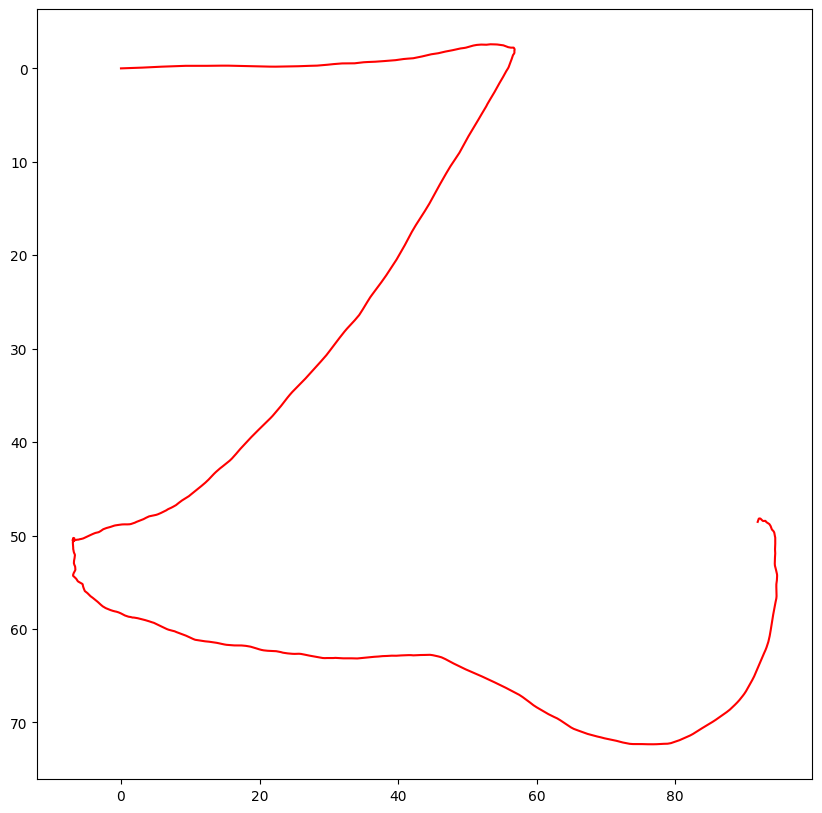

In [48]:
Xmean=[]
Ymean=[]
for i in range(len(x)):
    xnew, ynew = interpolate_path(x[i], y[i])
    if not np.isnan(xnew).all() and not np.isnan(ynew).all():
        Xmean.append(xnew)
        Ymean.append(ynew)

mean_x=np.mean(np.array(Xmean),axis=0)
mean_y=np.mean(np.array(Ymean),axis=0)
plt.figure(figsize=(10, 10))
plt.plot(mean_x, mean_y, label='Mean Glyph', color='red')
plt.gca().invert_yaxis()  
plt.show()

```{exercise} Glyph Similarity

 1. Come up with a scalar measure of the "dissimilarity" between two resampled glyphs (2 arrays of 1000 points), which is equal to 0 when both glyphs are identical and gets larger as the glyphs become more different.

 2. Compute the dissimilarity between each glyph and the mean glyph and compute the maximal dissimilarity for our collection of small variants.
```

In [53]:
#my idea is to modelize the dissimilarity with the euclidian distance
def measure_diss(xnew1,ynew1,xnew2,ynew2):
    return np.sqrt(np.sum((xnew1 - xnew2)**2+(ynew1 - ynew2)**2))

diss=[]
for i in range(len(x)):
    xnew, ynew = interpolate_path(x[i], y[i])
    diss.append(measure_diss(xnew,mean_x,ynew,mean_y))
max_diss=np.nanmax(diss)
print('the maximum dissimilarity is', max_diss)
print('it is obtained for the',diss.index(max_diss),' figure')

    

the maximum dissimilarity is 5528.375559618387
it is obtained for the 2  figure



```{exercise} Glyph Classification

 1. Create a document with several glyphs similar to the reference one and several ones wich are dissimilar. Save it as `docs/glyphs-misc.tldr".

 2. Generate automatically a new tldraw document `docs/glyphs-classified.tldr` with the same set of glyphs, but such that the glyphs are green when they are similar to the reference one and red if they are dissimilar.
```


![](images/glyphs-misc.png)

![](images/glyphs-misc-checked.png)

In [147]:
import json
import pprint
import matplotlib.pyplot as plt
glyph=open('glyphs-misc.tldr','r')
doc=json.load(glyph)
max_diss=2000

record_draw=[]
for record in doc['records']:
    if record.get('type')=='draw' and record.get('typeName') == 'shape':
        record_draw.append(record)
#print(record_draw[1])
x=[]
y=[]
for i in range(len(record_draw)):
    x.append([point['x'] for point in record_draw[i]['props']['segments'][0]['points']])
    y.append([point['y'] for point in record_draw[i]['props']['segments'][0]['points']])

def interpolate_path(x, y, nump=1000):
    t = np.linspace(0, 1, len(x))
    interp_fx = interp1d(t, x, kind='linear',fill_value="extrapolate")
    interp_fy = interp1d(t, y, kind='linear',fill_value="extrapolate")
    
    t_uniform = np.linspace(0, 1, nump)
    xnew = interp_fx(t_uniform)
    ynew = interp_fy(t_uniform)
    
    return xnew, ynew

xnew, ynew = None, None 

for i in range(len(x)):
    xnew, ynew = interpolate_path(x[i], y[i])

Xmean=[]
Ymean=[]
for i in range(len(x)):
    xnew, ynew = interpolate_path(x[i], y[i])
    if not np.isnan(xnew).all() and not np.isnan(ynew).all():
        Xmean.append(xnew)
        Ymean.append(ynew)

mean_x=np.mean(np.array(Xmean),axis=0)
mean_y=np.mean(np.array(Ymean),axis=0)

#pprint.pprint(doc['records'])
#print(doc['records'][6]['props']['color'])


dissimilarity=0
# Measure dissimilarity and update colors
for i in range(1,29):
    xnew, ynew = interpolate_path(x[i], y[i])
    dissimilarity=measure_diss(xnew,mean_x,ynew,mean_y)
    print(i)
    print(dissimilarity)
    if dissimilarity < max_diss:
        doc['records'][i+11]['props']['color'] = 'green'  # Green for similar
    else:
        doc['records'][i+11]['props']['color'] = 'red'  # Red for dissimilar

# Save the modified document
with open('./modified_glyphs-misc.tldr', 'w') as f:
    json.dump(doc, f)


1
3308.4469932761776
green
red
2
5506.258622030158
red
red
3
1800.0129475548695
red
green
4
1824.1492672739403
red
green
5
1962.6871837624558
black
green
6
2301.5453524870527
black
red
7
1831.755117897599
black
green
8
1990.3731507057946
black
green
9
2270.1319255551957
black
red
10
1973.46513470073
black
green
11
1776.2529835691496
black
green
12
2297.963999842149
black
red
13
2109.955328597503
black
red
14
2479.7945257104443
green
red
15
1895.1106877861603
black
green
16
2342.8982297586695
black
red
17
2854.2108697612884
black
red
18
3201.9299212787823
black
red
19
1950.774474199285
black
green
20
1841.308637581069
black
green
21
2142.4170078734683
black
red
22
1903.7061881601471
black
green
23
2190.190990114999
black
red
24
1957.4112071180955
black
green
25
2162.700359725007
black
red
26
1944.6747752989331
black
green
27
2780.312666253042
black
red
28
1741.9088453845923
black
green
